<a href="https://colab.research.google.com/github/nachodelis/AA_PRACTICA1_GRUPO_4/blob/main/AA_PRACTICA1_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo 4

Luis Ignacio de Lis Guijarro

Carlos Ocón Garay

In [ ]:
!git clone https://github.com/nachodelis/AA_PRACTICA1_GRUPO_4.git

Cloning into 'AA_PRACTICA1_GRUPO_4'...


Utilizaremos la **biblioteca Python Keras** para reconocer y clasificar imágenes de ropa. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. 

In [ ]:
#importamos keras
import keras
import tensorflow as tf
from keras import models
from keras import layers
keras.__version__ #Comprobamos que la versión sea 2.0.0 o posterior
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical

In [ ]:
#importamos lass imagenes y las separamos en train y test
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_images[1])
print(train_labels[1])

(60000, 28, 28)
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  4

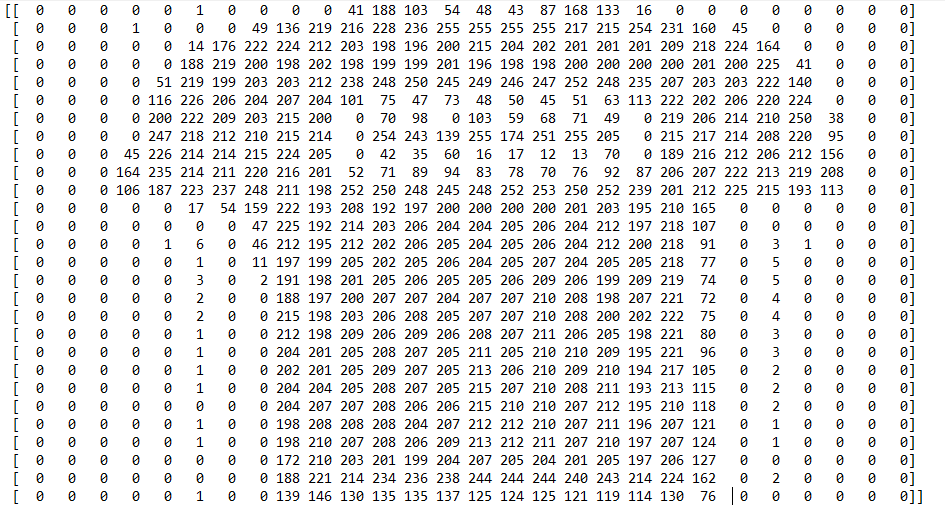

De nuestra primera imagen, podemos observar similitud a una camiseta

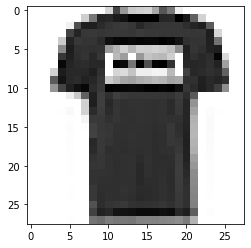

In [ ]:
imagen = train_images[1]
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()

##La ropa viene asignada con las siguientes etiquetas:

0.   Camiseta
1.   Pantalón
2.   Jersey
3.   Vestido
4.   Cazadora
5.   Sandalia
6.   Camisa
7.   Zapatillas
8.   Bolso
9.   Bota

#Arquitectura de la red:

Utilizaremos el primer caso, 10 neuronas, función de activación relu y optimizador sigmoidea.






In [ ]:


network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(10, activation='relu'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando')
network.summary()

Model: "Zalando"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 1 capa neuronal Flatten y 2 capas neuronales de tipo dense donde cada neurona de la primera capa está conectada a cada una de la segunda capa saliendo 10 respuestas que equivalen a cada tipo de prensa. 

#Como función de perdida utilizamos sparse_categorical_crossentropy'

In [ ]:

network.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#transformamos los datos 
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_images[1,:]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
       0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.19215687, 0.53333336, 0.85882354, 0.84705883, 0.89411765,
       0.9254902 , 1.        , 1.        , 1.        , 1.        ,
       0.8509804 , 0.84313726, 0.99607843, 0.90588236, 0.627451  ,
       0.1764706 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05490196, 0.6901961 , 0.87058824, 0.8784314 ,
       0.83137256, 0.79607844, 0.7764706 , 0.76862746, 0.78431374,
       0.84313726, 0.8       , 0.7921569 , 0.7882353 , 0.78823

#Entrenamos el sistema

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3834 - accuracy: 0.5751
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8605 - accuracy: 0.7052
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7347 - accuracy: 0.7434
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.7664
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6229 - accuracy: 0.7825


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)


313/313 [==============================] - 0s 997us/step - loss: 0.6338 - accuracy: 0.7705


Tenemos una precisión de casi el 80%


##Matriz de confusión:

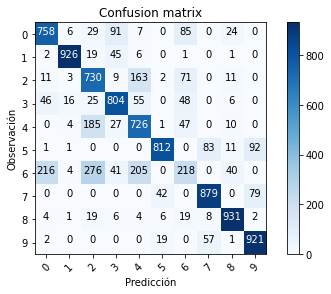

In [ ]:

test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))


A través de la diagonal de la matriz podemos observar el numero de veces que ha acertado la prenda, mientras que en el resto de la matriz podemos ver que número de veces ha fallado

Predicción:

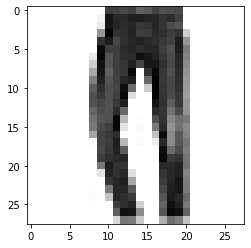

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 * 28))
predtest_images = predtest_images.reshape((10000, 28 * 28))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = network.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = network.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')




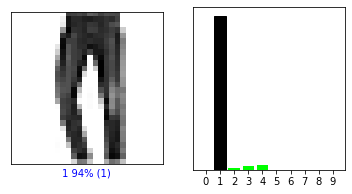

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

##Otros casos

#Caso 2


In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(10, activation='relu'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando2')
network.summary()



Model: "Zalando2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 1 capa neuronal Flatten y 2 capas neuronales de tipo dense donde cada neurona de la primera capa está conectada a cada una de la segunda capa saliendo 10 respuestas que equivalen a cada tipo de prensa. 

In [ ]:
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8869 - accuracy: 0.7134
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5386 - accuracy: 0.8176
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4892 - accuracy: 0.8332
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4661 - accuracy: 0.8395
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4512 - accuracy: 0.8446


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.8308


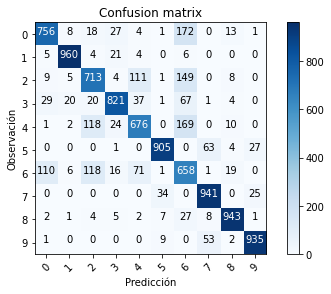

In [ ]:
test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Al cambiar de optimizador el acierto aumenta a un valor de mas del 80%

Predicción:

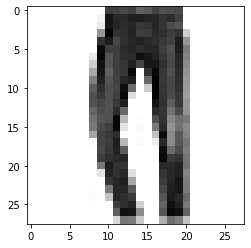

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 * 28))
predtest_images = predtest_images.reshape((10000, 28 * 28))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = network.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = network.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')


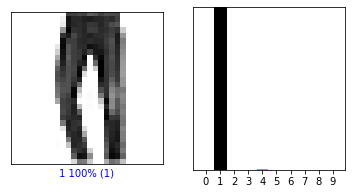

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

#Caso 3

In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(10, activation='sigmoid'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando3')
network.summary()

Model: "Zalando3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 1 capa neuronal Flatten y 2 capas neuronales de tipo dense donde cada neurona de la primera capa está conectada a cada una de la segunda capa saliendo 10 respuestas que equivalen a cada tipo de prensa. 

In [ ]:
network.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1311 - accuracy: 0.3769
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8558 - accuracy: 0.5267
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6546 - accuracy: 0.5509
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.5023 - accuracy: 0.5706
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3819 - accuracy: 0.5910


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.3365 - accuracy: 0.5974


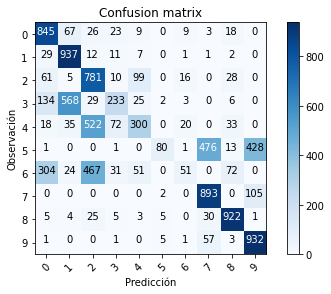

In [ ]:
test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

En este caso, la función sigmoid provoca un porcentaje mucho mas bajo de acierto

Predicción:

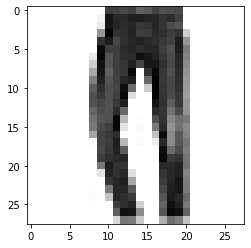

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 * 28))
predtest_images = predtest_images.reshape((10000, 28 * 28))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = network.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = network.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

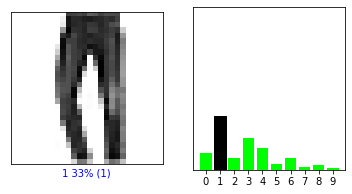

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

#Caso 4

In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(10, activation='sigmoid'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando4')
network.summary()

Model: "Zalando4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 1 capa neuronal Flatten y 2 capas neuronales de tipo dense donde cada neurona de la primera capa está conectada a cada una de la segunda capa saliendo 10 respuestas que equivalen a cada tipo de prensa. 

In [ ]:
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3710 - accuracy: 0.6284
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8305 - accuracy: 0.7650
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6456 - accuracy: 0.8065
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.8241
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5076 - accuracy: 0.8335


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.8277


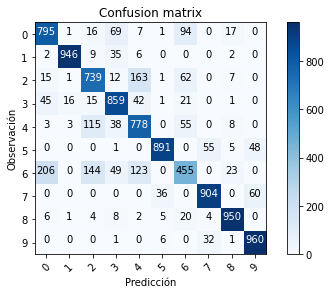

In [ ]:
test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Al utilizar el optimizador rmsprop, la red obtiene un porcentaje de acierto parecido al del caso 2

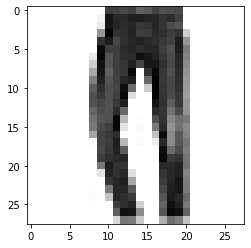

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 * 28))
predtest_images = predtest_images.reshape((10000, 28 * 28))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = network.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = network.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

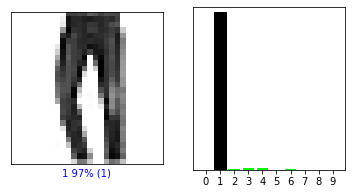

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

#Caso 5

In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(512, activation='relu'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando5')
network.summary()

Model: "Zalando5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 1 capa neuronal Flatten y 2 capas neuronales de tipo dense donde cada neurona de la primera capa, siendo esta vez 512 está conectada a cada una de la segunda capa saliendo 10 respuestas que equivalen a cada tipo de prensa. El aumentar el número de neuronas hace aumentar también a grán escala el número de parametros

In [ ]:
network.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.0010 - accuracy: 0.6972
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.6509 - accuracy: 0.7929
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5761 - accuracy: 0.8139
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5365 - accuracy: 0.8237
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5105 - accuracy: 0.8309


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.8196


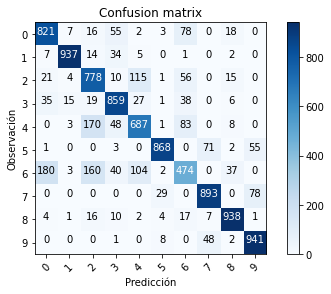

In [ ]:
test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Al implementar 512 neuronas en la segunda capa en vez de 10, seguimos obteniendo un % parecido de acierto

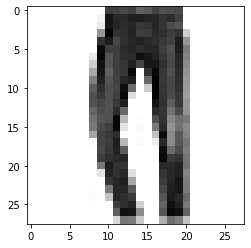

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 * 28))
predtest_images = predtest_images.reshape((10000, 28 * 28))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = network.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = network.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

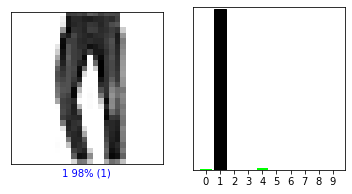

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

#Caso 6

In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(512, activation='relu'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando6')
network.summary()

Model: "Zalando6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 1 capa neuronal Flatten y 2 capas neuronales de tipo dense donde cada neurona de la primera capa, siendo esta vez 512 está conectada a cada una de la segunda capa saliendo 10 respuestas que equivalen a cada tipo de prensa. El aumentar el número de neuronas hace aumentar también a grán escala el número de parametros

In [ ]:
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5567 - accuracy: 0.8010
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3795 - accuracy: 0.8615
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3363 - accuracy: 0.8751
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3092 - accuracy: 0.8856
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2916 - accuracy: 0.8927


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8808


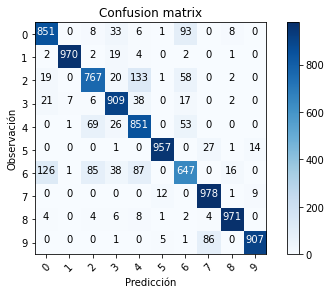

In [ ]:
test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Con la función relu y el optimizador rmsprop, se obtiene casi un 90% de acierto

Predicción:

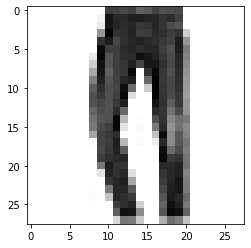

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 * 28))
predtest_images = predtest_images.reshape((10000, 28 * 28))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = network.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = network.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

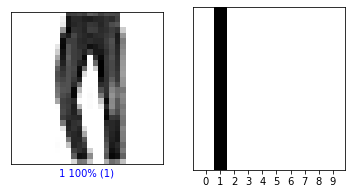

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

#Caso 7

In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(512, activation='sigmoid'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando7')
network.summary()

Model: "Zalando7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 1 capa neuronal Flatten y 2 capas neuronales de tipo dense donde cada neurona de la primera capa, siendo esta vez 512 está conectada a cada una de la segunda capa saliendo 10 respuestas que equivalen a cada tipo de prensa. El aumentar el número de neuronas hace aumentar también a grán escala el número de parametros

In [ ]:
network.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.7164 - accuracy: 0.5903
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 1.1345 - accuracy: 0.7104
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.9277 - accuracy: 0.7315
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.8250 - accuracy: 0.7439
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.7627 - accuracy: 0.7527


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7518 - accuracy: 0.7501


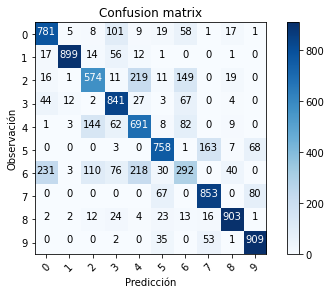

In [ ]:
test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Predicción:

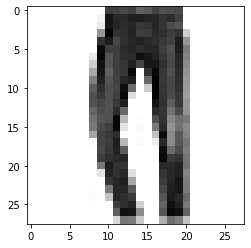

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 * 28))
predtest_images = predtest_images.reshape((10000, 28 * 28))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = network.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = network.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

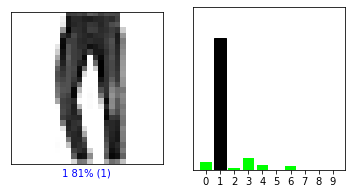

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

#Caso 8

In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(512, activation='sigmoid'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando8')
network.summary()

Model: "Zalando8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 1 capa neuronal Flatten y 2 capas neuronales de tipo dense donde cada neurona de la primera capa, siendo esta vez 512 está conectada a cada una de la segunda capa saliendo 10 respuestas que equivalen a cada tipo de prensa. El aumentar el número de neuronas hace aumentar también a grán escala el número de parametros

In [ ]:
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5893 - accuracy: 0.7929
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4272 - accuracy: 0.8459
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3868 - accuracy: 0.8599
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3592 - accuracy: 0.8703
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3384 - accuracy: 0.8763


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8645


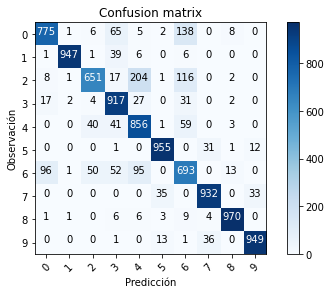

In [ ]:
test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Tras los 8 diferentes casos, los mas optimos son el caso 8 y el caso 6, al obtener un porcentaje más alto de aciertos.

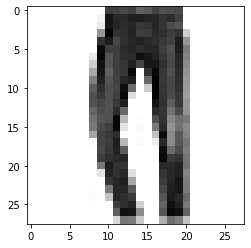

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 * 28))
predtest_images = predtest_images.reshape((10000, 28 * 28))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = network.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = network.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

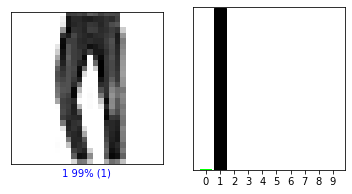

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

#Caso 2 y 7 con 25 epochs

In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(512, activation='sigmoid'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando7.2')
network.summary()

Model: "Zalando7.2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 3s 6ms/step - loss: 1.7129 - accuracy: 0.5696
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 1.1323 - accuracy: 0.7116
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.9255 - accuracy: 0.7305
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.8235 - accuracy: 0.7425
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.7619 - accuracy: 0.7528
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.7198 - accuracy: 0.7594
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6888 - accuracy: 0.7662
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6643 - accuracy: 0.7728
Epoch 9/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6443 - accuracy: 0.7784
Epoch 10/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6270 - accuracy: 0.7835

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5326 - accuracy: 0.8107


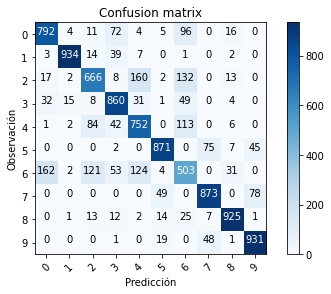

In [ ]:
test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Al aumentar las epochs, el porcentaje de acierto sube en casi un 10% en el caso 7

In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(10, activation='relu'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando2.2')
network.summary()

Model: "Zalando2.2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.8973 - accuracy: 0.6957
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.8100
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.8276
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4761 - accuracy: 0.8359
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4592 - accuracy: 0.8416
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4481 - accuracy: 0.8449
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.8489
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4302 - accuracy: 0.8513
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4243 - accuracy: 0.8529
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8546

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.8398


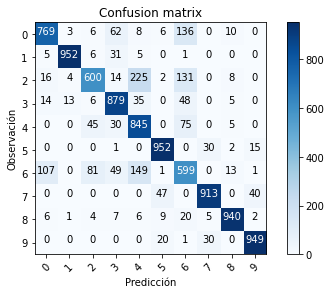

In [ ]:
test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

En cambio el caso 2 con 25 epochs se mantiene muy parecido y casi no mejora el porcentaje de acierto.

#Predicción

Al aplicar la sexta imagen a los 8 casos, obtenemos que todos aciertan la prenda, con números bastante altos de probabilidad, menos el caso 3, que solo le da a la imagen un 33%, siendo aun así la más alta.

#Caso 3 mejorado

In [ ]:
network= keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(10, activation='sigmoid'),
                           keras.layers.Dense(10,activation='softmax')
],name='Zalando3')
network.summary()




Model: "Zalando3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4178 - accuracy: 0.6223
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8600 - accuracy: 0.7713
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6642 - accuracy: 0.8123
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5691 - accuracy: 0.8274
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5166 - accuracy: 0.8360


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
test_labelsp = to_categorical(test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.8284


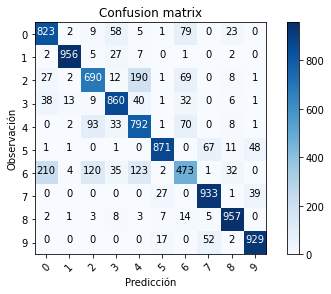

In [ ]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Al aplicar el optimizador Adam se sigue manteniendo en un rango parecido de aciertos, no se puede observar mejora.